# Prac 03. Part 1

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

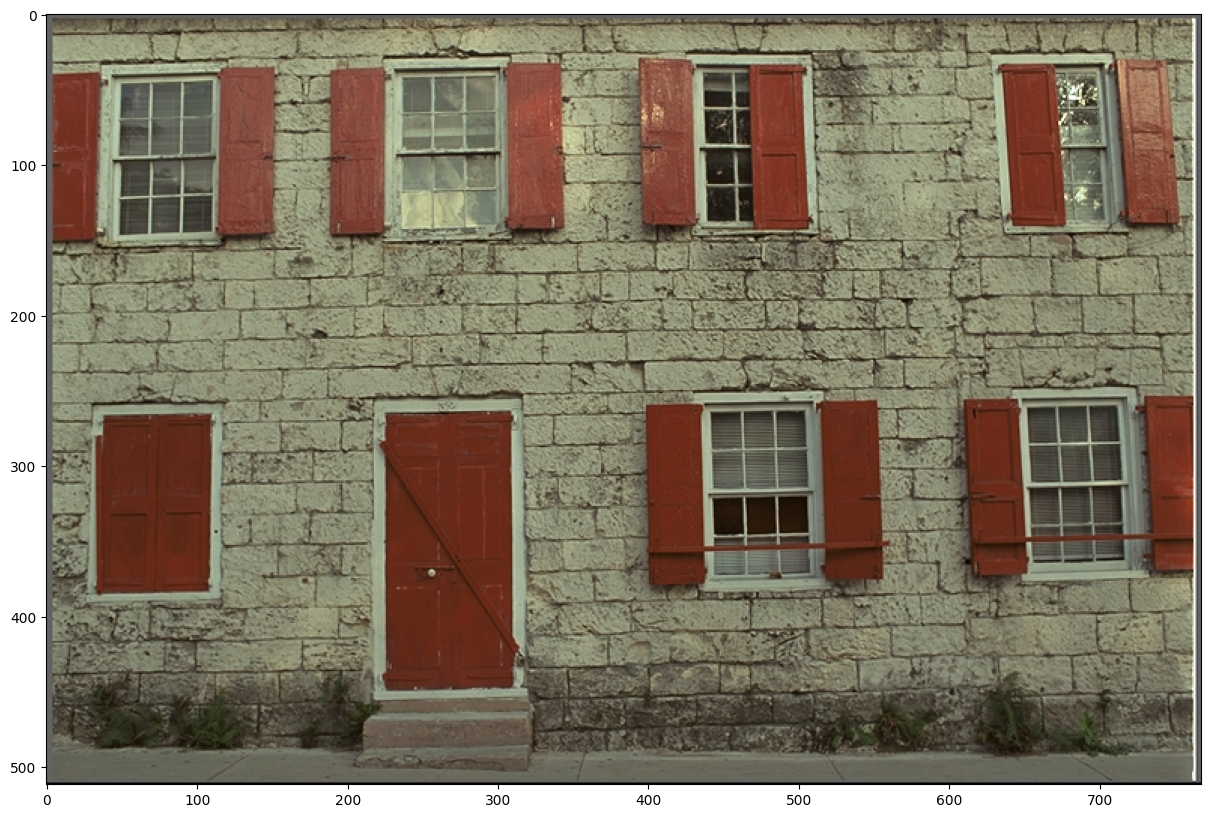

In [14]:
img = cv2.imread('kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

(<Axes: >, <matplotlib.image.AxesImage at 0x12c50158e60>)

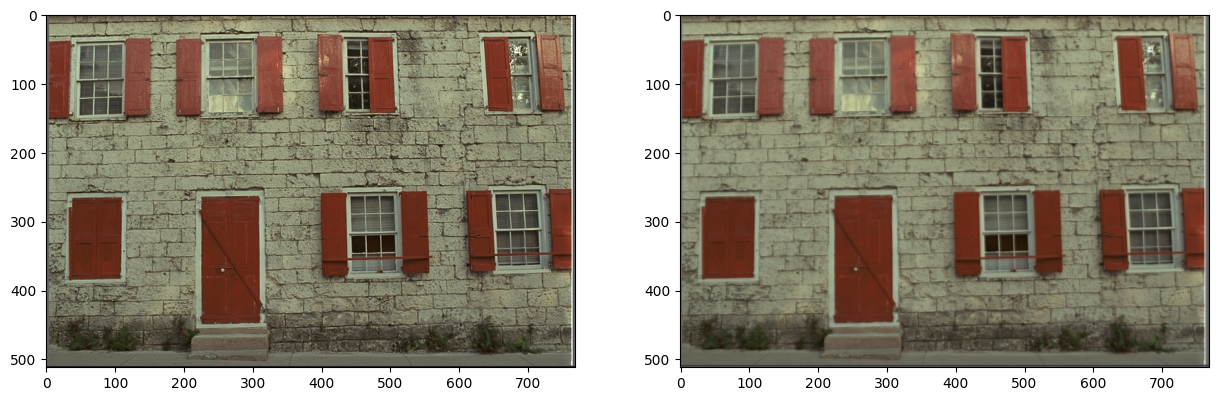

In [31]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size))
for i in range(kernel_size):
    for j in range(kernel_size):
        kernel[i][j] = 2**(i+j)
kernel = kernel/np.sum(kernel)
unsharp = cv2.filter2D(src = img, ddepth = -1, kernel = kernel)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(unsharp)

(<Axes: >, <matplotlib.image.AxesImage at 0x12c50209310>)

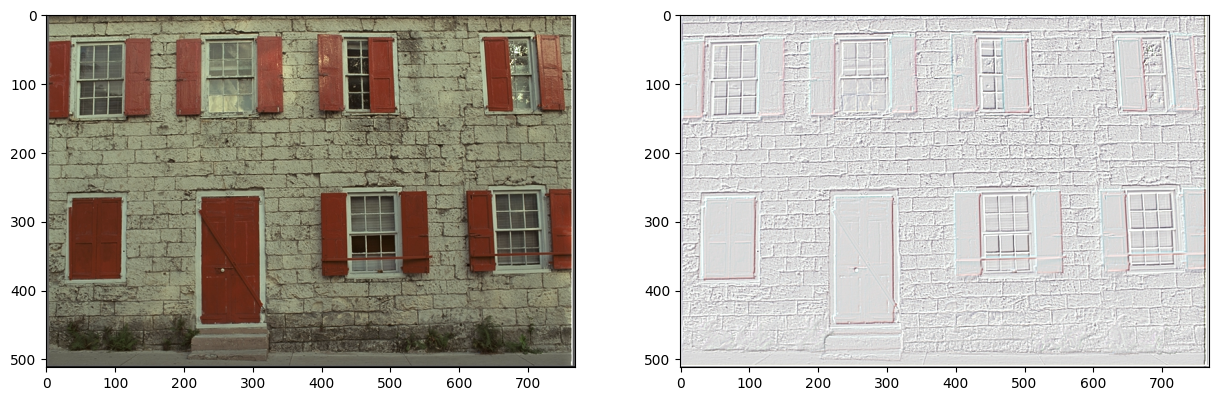

In [32]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = img.astype(np.float32) - unsharp.astype(np.float32)

diff_show = (diff-np.min(diff))*255/np.max(diff)
diff_show = np.clip(diff_show, 0, 255).astype(np.uint8)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(diff_show)


(<Axes: >, <matplotlib.image.AxesImage at 0x12c503152e0>)

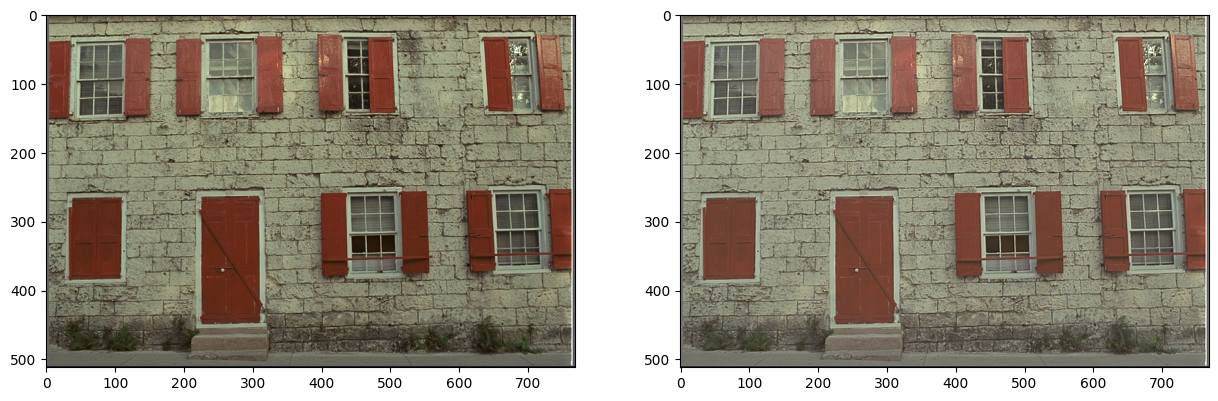

In [35]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
amount = 0.2
sharpened = img.astype(np.float32) + (img.astype(np.float32) - unsharp) * amount
sharpened = (sharpened-np.min(sharpened))*255/np.max(sharpened)
sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(sharpened)

### Questions
* What is a good (reasonable) value for the `amount` parameter? -- 0.2 seems fine
 * What happens if it is too small? -- nothing happens
 * What happens if it is too large? -- whitening and oversharpening

(<Axes: >, <matplotlib.image.AxesImage at 0x12c570d0500>)

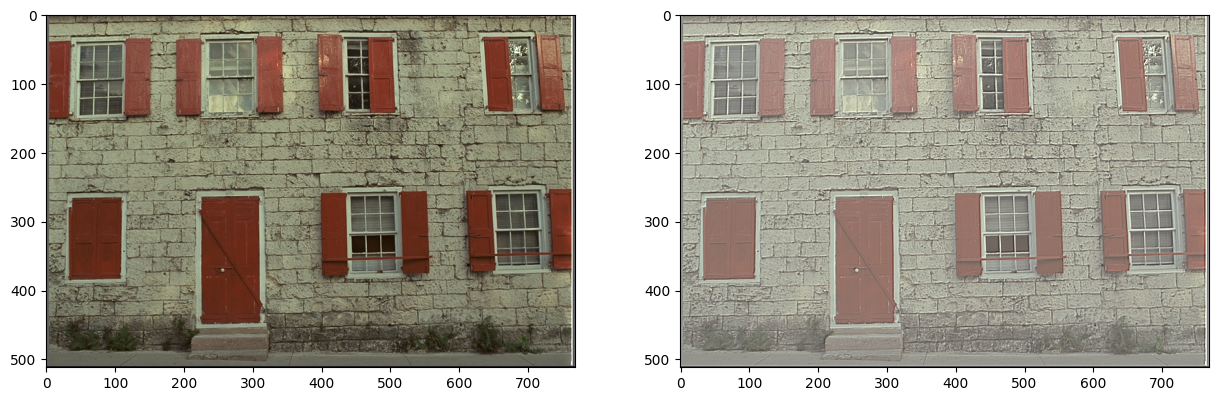

In [36]:
# Too large amount (whitening)
amount = 0.9
sharpened = img.astype(np.float32) + (img.astype(np.float32) - unsharp) * amount
sharpened = (sharpened-np.min(sharpened))*255/np.max(sharpened)
sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(sharpened)

(<Axes: >, <matplotlib.image.AxesImage at 0x12c5719fe90>)

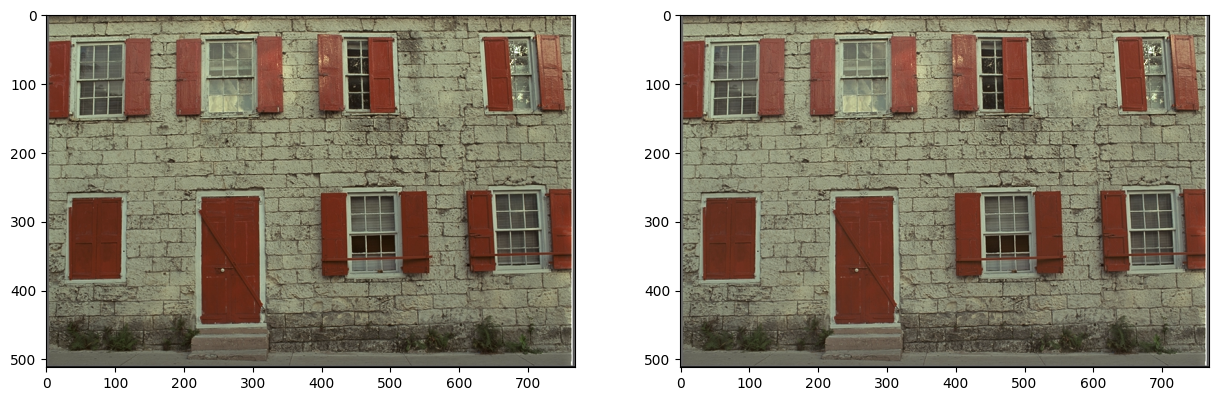

In [38]:
# Too small amount (nothing happens)
amount = 0.05
sharpened = img.astype(np.float32) + (img.astype(np.float32) - unsharp) * amount
sharpened = (sharpened-np.min(sharpened))*255/np.max(sharpened)
sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(sharpened)